In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('CC GENERAL.txt')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data[data['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [6]:
data[data['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [7]:
data = data.fillna({'MINIMUM_PAYMENTS':0})

In [8]:
data = data.fillna({'CREDIT_LIMIT':0})

In [9]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

In [10]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

In [11]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [12]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X = np.asarray(data)

In [13]:
data.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,0,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0


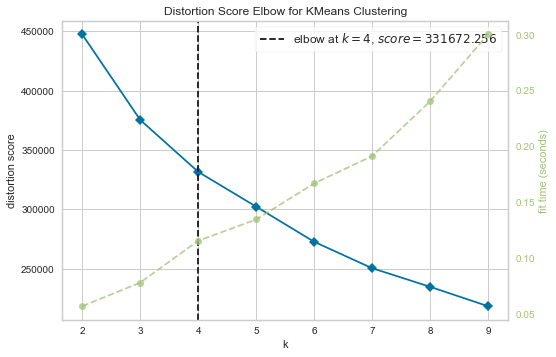

In [14]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data)
visualizer.show()
plt.show()

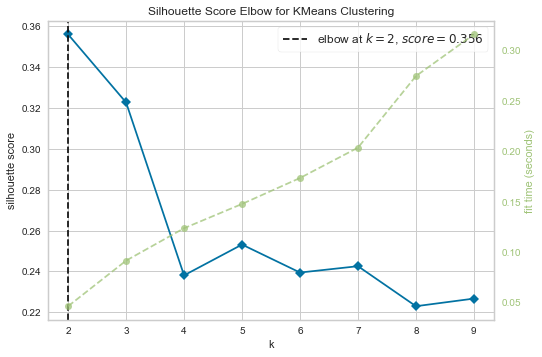

In [15]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(data)
visualizer.show()
plt.show()

In [16]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 0.36067954, -0.97851102, -0.43862278, ..., -0.54119881,
        -0.64681226, -0.69462206],
       [ 0.36067954,  1.29798329, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [ 0.36067954,  0.53915185,  0.30290987, ..., -0.54119881,
         0.25898804, -0.69462206],
       ...,
       [-4.12276757, -0.97851102, -0.43862278, ...,  0.45299851,
        -0.64681226, -0.69462206],
       [-4.12276757, -0.97851102, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [-4.12276757, -0.97851102,  1.04444252, ..., -0.54119881,
         1.16478834,  0.12597818]])

In [17]:
clusterNum = 4
k_means = KMeans(algorithm = 'auto', init = 'k-means++', n_clusters = clusterNum, random_state = 42)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 3 ... 0 2 3]


In [18]:
data['Clas_km'] = labels
data.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,Clas_km
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,1
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,2
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,3
3,12,3,3,3,0,1,5,0,0,7,1,1,0,1,0,1,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,1


In [19]:
k_means.cluster_centers_

array([[11.46339363,  1.9005168 ,  1.96339363,  0.53014643,  1.77734711,
         0.64039621,  3.50645995,  2.15546942,  1.5749354 ,  9.37984496,
         9.22609819,  0.84625323,  8.79888028,  0.75796727,  2.56330749,
         3.67398794,  0.42075797],
       [11.52834943,  1.61864763,  1.41159177,  1.01469971,  0.57622848,
         0.40571189,  3.53296934,  1.80302394,  1.19319614,  7.14699706,
         3.23603528,  1.61276774,  1.68080638,  0.37673247,  1.47963041,
         1.46619068,  0.25157497],
       [11.39105935,  3.08602554,  0.38617581,  0.32682194,  0.09691961,
         2.72501878,  3.80728775,  2.41510143,  1.92599549,  9.57212622,
         0.71975958,  0.49511645,  0.23403456,  3.43275733,  0.32118708,
         0.39143501,  1.86288505],
       [11.79179811,  2.52933754,  3.34132492,  2.9022082 ,  1.69526814,
         0.88391167,  4.49526814,  3.26624606,  1.6851735 ,  9.87760252,
         9.36908517,  7.92050473,  5.85425868,  1.1362776 ,  2.70410095,
         5.46876972

In [20]:
data.groupby('Clas_km').mean()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
Clas_km,,,,,,,,,,,,,,,,,
0,11.463394,1.900517,1.963394,0.530146,1.777347,0.640396,3.506460,2.155469,1.574935,9.379845,9.226098,0.846253,8.798880,0.757967,2.563307,3.673988,0.420758
1,11.528151,1.617227,1.409664,1.012605,0.576050,0.405042,3.531933,1.801681,1.192017,7.144118,3.233193,1.610084,1.681092,0.376891,1.479832,1.464286,0.251261
2,11.391059,3.086777,0.387303,0.327949,0.097295,2.725770,3.808415,2.415853,1.926371,9.573629,0.721262,0.495868,0.234410,3.432757,0.321563,0.391811,1.863261
3,11.791929,2.529634,3.341110,2.902270,1.694199,0.883354,4.494325,3.266078,1.686003,9.877680,9.366961,7.919294,5.850567,1.135561,2.702396,5.468474,0.656368


In [21]:
k_means_sizes = data.groupby('Clas_km').size().to_frame()
k_means_sizes.columns = ['km_size']
k_means_sizes

,km_size
Clas_km,
0,2322
1,2380
2,2662
3,1586


Наблюдения:
1. Достаточно четко прошло деление покупателей на четыре кластера по параметру PURCHASES_TRX и по остатку средств BALANCE;
2. Наблюдается деление покупателей по способу оплаты: в один кластер попали покупатели, предпочитающие оплачивать покупки наличными средствами CASH_ADVANCE, в три других кластера попали покупатели, оплачивающие покупки банковскими картами;
3. Интересно, что покупатели, оплачивающие покупки наличными средствами, меньше всего тратят деньги PURCHASES;
4. Распределение покупателей на кластеры прошло достаточно равномерно.

In [22]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2'])
pca_data.head()

,PC1,PC2
0,-4.695841,-2.184203
1,-7.369444,0.745464
2,3.166201,7.178507
3,-5.662795,0.354806
4,-5.565550,-0.195304


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

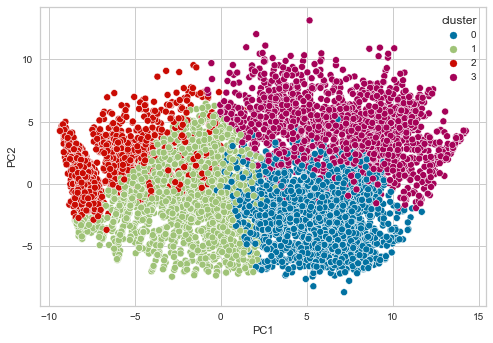

In [23]:
pca_data['cluster'] = pd.Categorical(k_means.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)